In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import sys
sys.path.append("../")
from model import SarimaModel

In [4]:
df = pd.read_csv("../data/hamachi_price.csv")

In [5]:
df["date"] = df["date"].apply(lambda x: pd.to_datetime(str(x)))
df = df.set_index(df["date"])

In [6]:
train = df["quantity"]

In [7]:
sarima = SarimaModel()

In [8]:
sarima_fit = sarima.fit(train)

/Users/estyle-074/opt/anaconda3/envs/sub1/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/estyle-074/opt/anaconda3/envs/sub1/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09716D+01    |proj g|=  7.30389D-02

At iterate    5    f=  1.08855D+01    |proj g|=  4.22012D-03

At iterate   10    f=  1.08851D+01    |proj g|=  5.39915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   2.879D-05   1.089D+01
  F =   10.885107168862149     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          quantity   No. Observations:                 4016
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -43714.590
Date:                           Thu, 16 Mar 2023   AIC                          87439.181
Time:                                   09:19:06   BIC                          87470.661
Sample:                               03-01-2012   HQIC                         87450.339
                                    - 02-27-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0036      0.014     -0.257      0.797      -0.031       0.024
ma.L1         -0.9244      0.007   -133.925      0.000      -0.938      -0.911
ar.S.L7        0.0841      0.021      4.002      0.000       0.043       0.125
ma.S.L7       -0.8779      0.013    -67.887      0.000      -0.903      -0.853
sigma2      2.843e+08   2.36e-11    1.2e+19      0.000    2.84e+08    2.84e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17053.48
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.04
Prob(H) (two-sided):                  0.13   Kurtosis:                        13.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.86e+33. Standard errors may be unstable.
"""

In [10]:
test_pred = sarima.predict(sarima_fit)

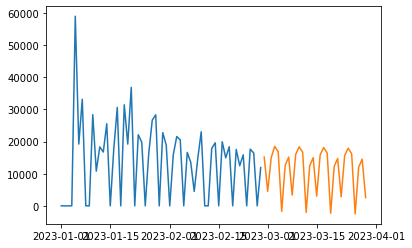

In [11]:
plt.plot(df.loc["2023"]["quantity"])
plt.plot(test_pred)
plt.show()